In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("train.csv")
df.head()

C:\Users\sneha\AppData\Local\Temp\ipykernel_14748\2778680956.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


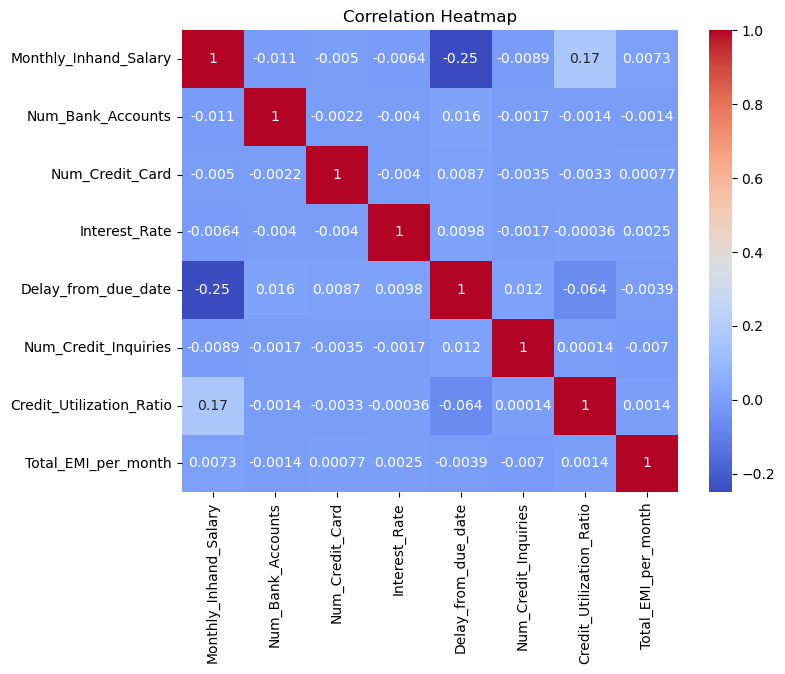

In [8]:
numeric_df=df.select_dtypes(include=[np.number])
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
Y=df['Credit_Score']
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
#convert object to numeric
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly']).mean()
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary']).mean()

In [14]:
#normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
#convert id array to 2d array
Amount_invested_monthly=df['Amount_invested_monthly'].values.reshape(-1,1)
Monthly_Inhand_Salary=df['Monthly_Inhand_Salary'].values.reshape(-1,1)
scaler=MinMaxScaler()
x1=scaler.fit_transform(Amount_invested_monthly)
x2=scaler.fit_transform(Monthly_Inhand_Salary)



In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(x1)
X2=scaler.fit_transform(x2)


In [16]:
#Assuming x1 and x2 are lists arrays of your feature values
#combine x1 and x2 into a single 2D array for training
x_train=np.column_stack((X1,X2))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
y=df['Credit_Score'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.2,random_state=0)
y_train.shape

(80000, 1)

In [19]:
pip install --upgrade scikit-learn imbalanced-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 640.0 kB/s eta 0:00:18
   ---------------------------------------- 0.0/11.0 MB 326.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/11.0 MB 655.4 kB/s eta 0:00:17
   -----------------------------------

In [22]:
pip install imbalanced-learn scikit-learn

In [29]:
!pip install scikit-learn==1.0.2 imbalanced-learn==0.8.1





     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB 245.8 kB/s eta 0:00:28
      --------------------------------------- 0.1/6.7 MB 544.7 kB/s eta 0:00:13
     - -------------------------------------- 0.2/6.7 MB 831.5 kB/s eta 0:00:08
     -- ------------------------------------- 0.4/6.7 MB 1.3 MB/s eta 0:00:05
     --- ------------------------------------ 0.6/6.7 MB 1.7 MB/s eta 0:00:04
     ------ --------------------------------- 1.0/6.7 MB 2.8 MB/s eta 0:00:03
     -------- ------------------------------- 1.4/6.7 MB 3.5 MB/s eta 0:00:02
     ----------- ---------------------------- 2.0/6.7 MB 4.4 MB/s eta 0:00:02
     --------------- ------------------------ 2.5/6.7 MB 5.0 MB/s eta 0:00:01
     ------------------ --------------------- 3.1/6.7 MB 5.7 MB/s eta 0:00:01
 

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\sneha\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\sneh

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='newton-cg',C=0.05,multi_class='multinomial',random_state=0)
model.fit(x_train,y_train)

C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  X : {ndarray, list, sparse matrix}


LogisticRegression(C=0.05, multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [38]:
y_pred=model.predict(x_test)

In [39]:
model.score(x_train,y_train)
model.score(x_test,y_test)

0.52925

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[    0,     0,  3589],
       [    0,     0,  5826],
       [    0,     0, 10585]], dtype=int64)

In [41]:
print (classification_report(y_test,y_pred))

C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      3589
        Poor       0.00      0.00      0.00      5826
    Standard       0.53      1.00      0.69     10585

    accuracy                           0.53     20000
   macro avg       0.18      0.33      0.23     20000
weighted avg       0.28      0.53      0.37     20000



C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.52925
